In [1]:
import pandas as pd

df = pd.read_csv('NREGA.csv')

print(df.head())


print(df.info())


df = df.fillna(0)


            state_name             district_name  \
0  ANDAMAN AND NICOBAR                  NICOBARS   
1  ANDAMAN AND NICOBAR  NORTH AND MIDDLE ANDAMAN   
2  ANDAMAN AND NICOBAR             SOUTH ANDAMAN   
3       ANDHRA PRADESH                SRIKAKULAM   
4       ANDHRA PRADESH              VIZIANAGARAM   

   Total No. of JobCards issued  Total No. of Workers  \
0                          6173                  9866   
1                         18521                 29500   
2                         13726                 17491   
3                        445787                743762   
4                        388651                694622   

   Total No. of Active Job Cards  Total No. of Active Workers  \
0                           1007                         2011   
1                           6477                        11920   
2                           3420                         5016   
3                         384349                       680409   
4                  

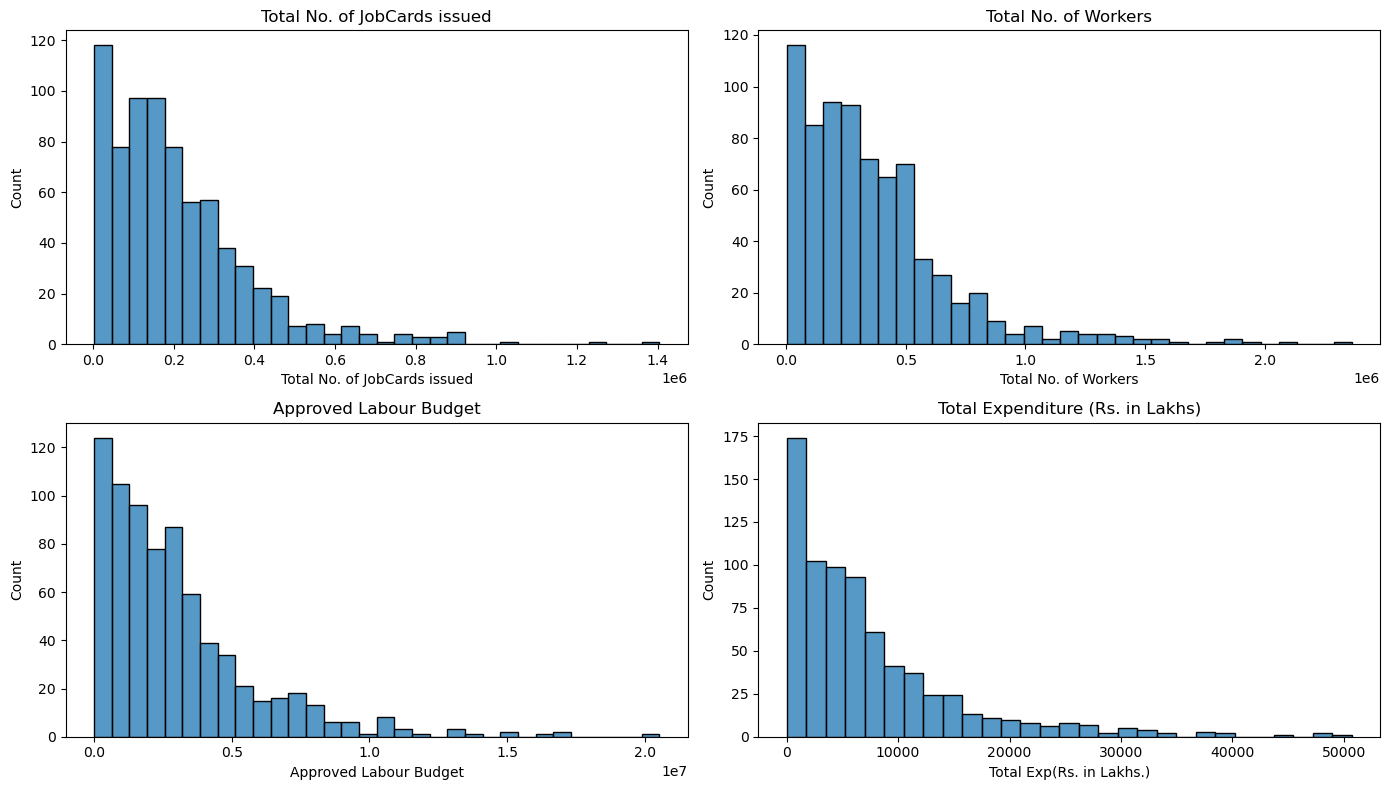

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('NREGA.csv')

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['Total No. of JobCards issued']) 
plt.title('Total No. of JobCards issued')

plt.subplot(2, 2, 2)
sns.histplot(df['Total No. of Workers'])  
plt.title('Total No. of Workers')

plt.subplot(2, 2, 3)
sns.histplot(df['Approved Labour Budget']) 
plt.title('Approved Labour Budget')
plt.subplot(2, 2, 4)
sns.histplot(df['Total Exp(Rs. in Lakhs.)'])  
plt.title('Total Expenditure (Rs. in Lakhs)')

plt.tight_layout()
plt.show()


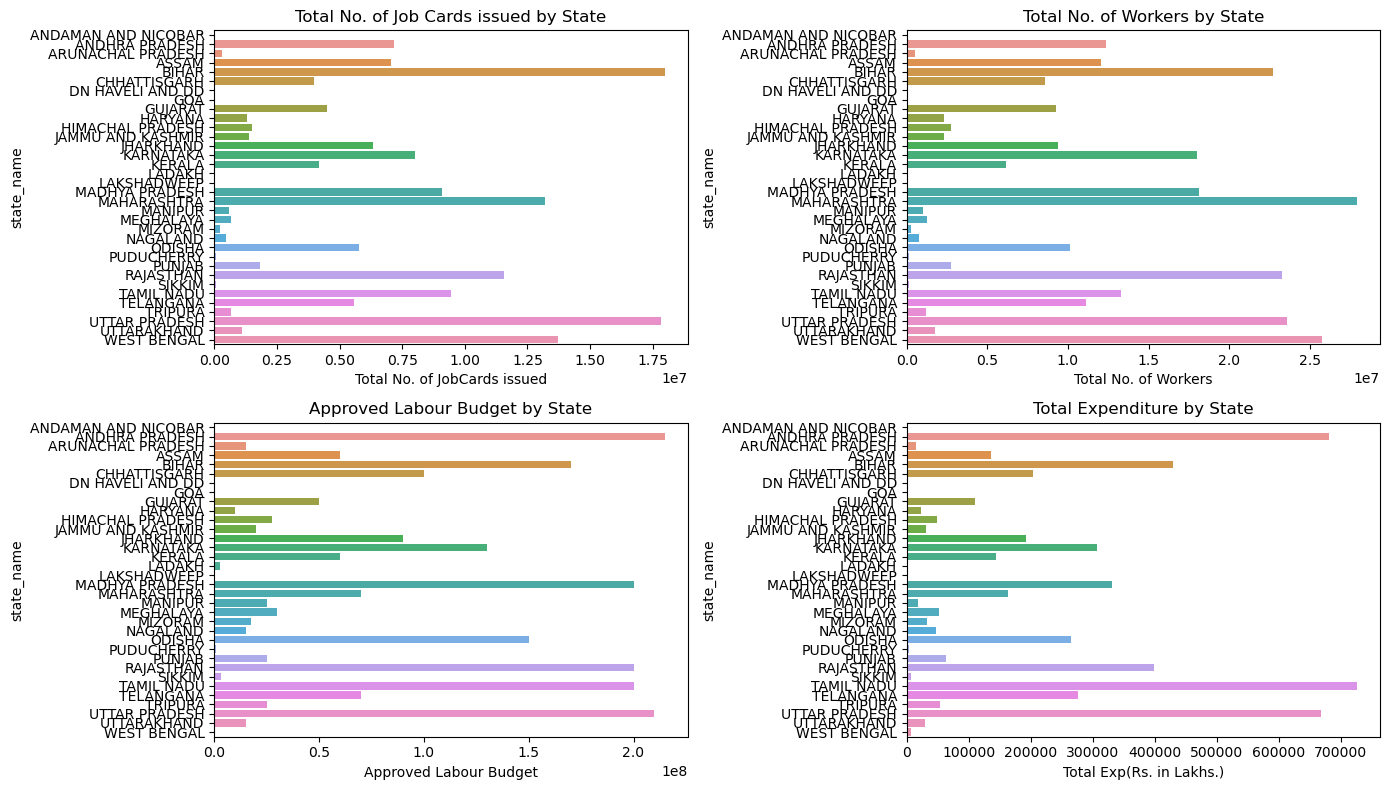

In [3]:
state_summary = df.groupby('state_name').agg({
    'Total No. of JobCards issued': 'sum',
    'Total No. of Workers': 'sum',
    'Approved Labour Budget': 'sum',
    'Total Exp(Rs. in Lakhs.)': 'sum'
}).reset_index()

plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.barplot(data=state_summary, x='Total No. of JobCards issued', y='state_name')
plt.title('Total No. of Job Cards issued by State')

plt.subplot(2, 2, 2)
sns.barplot(data=state_summary, x='Total No. of Workers', y='state_name')
plt.title('Total No. of Workers by State')
plt.subplot(2, 2, 3)
sns.barplot(data=state_summary, x='Approved Labour Budget', y='state_name')
plt.title('Approved Labour Budget by State')
plt.subplot(2, 2, 4)
sns.barplot(data=state_summary, x='Total Exp(Rs. in Lakhs.)', y='state_name')
plt.title('Total Expenditure by State')

plt.tight_layout()
plt.show()


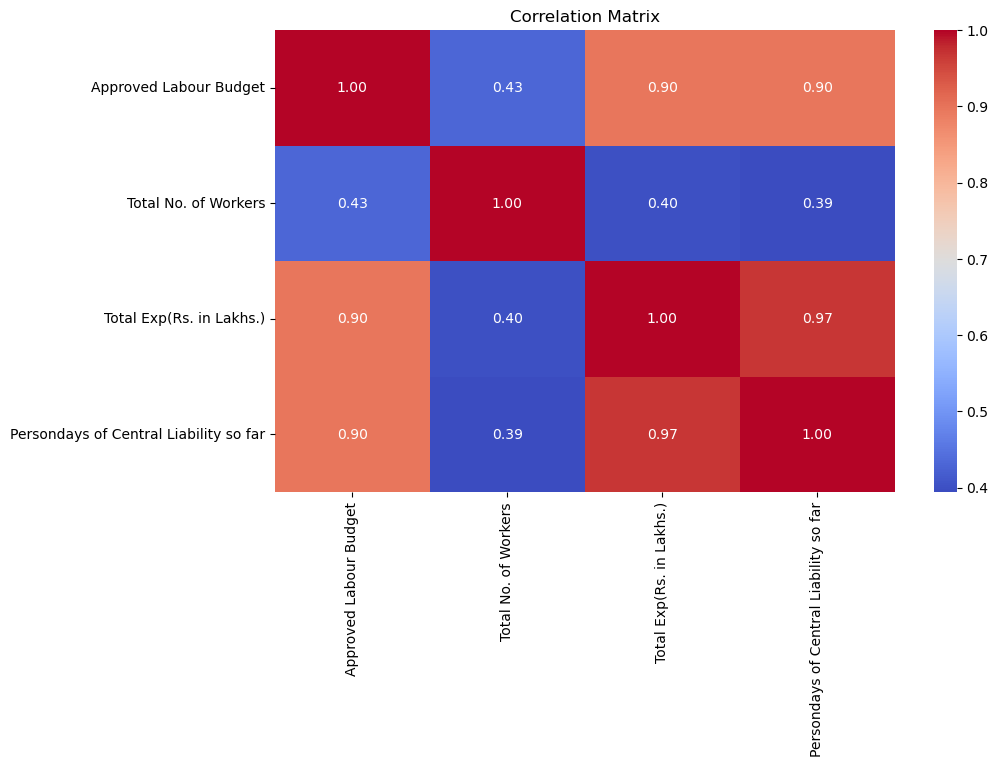

In [4]:
correlation_matrix = df[['Approved Labour Budget', 'Total No. of Workers', 'Total Exp(Rs. in Lakhs.)', 'Persondays of Central Liability so far']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



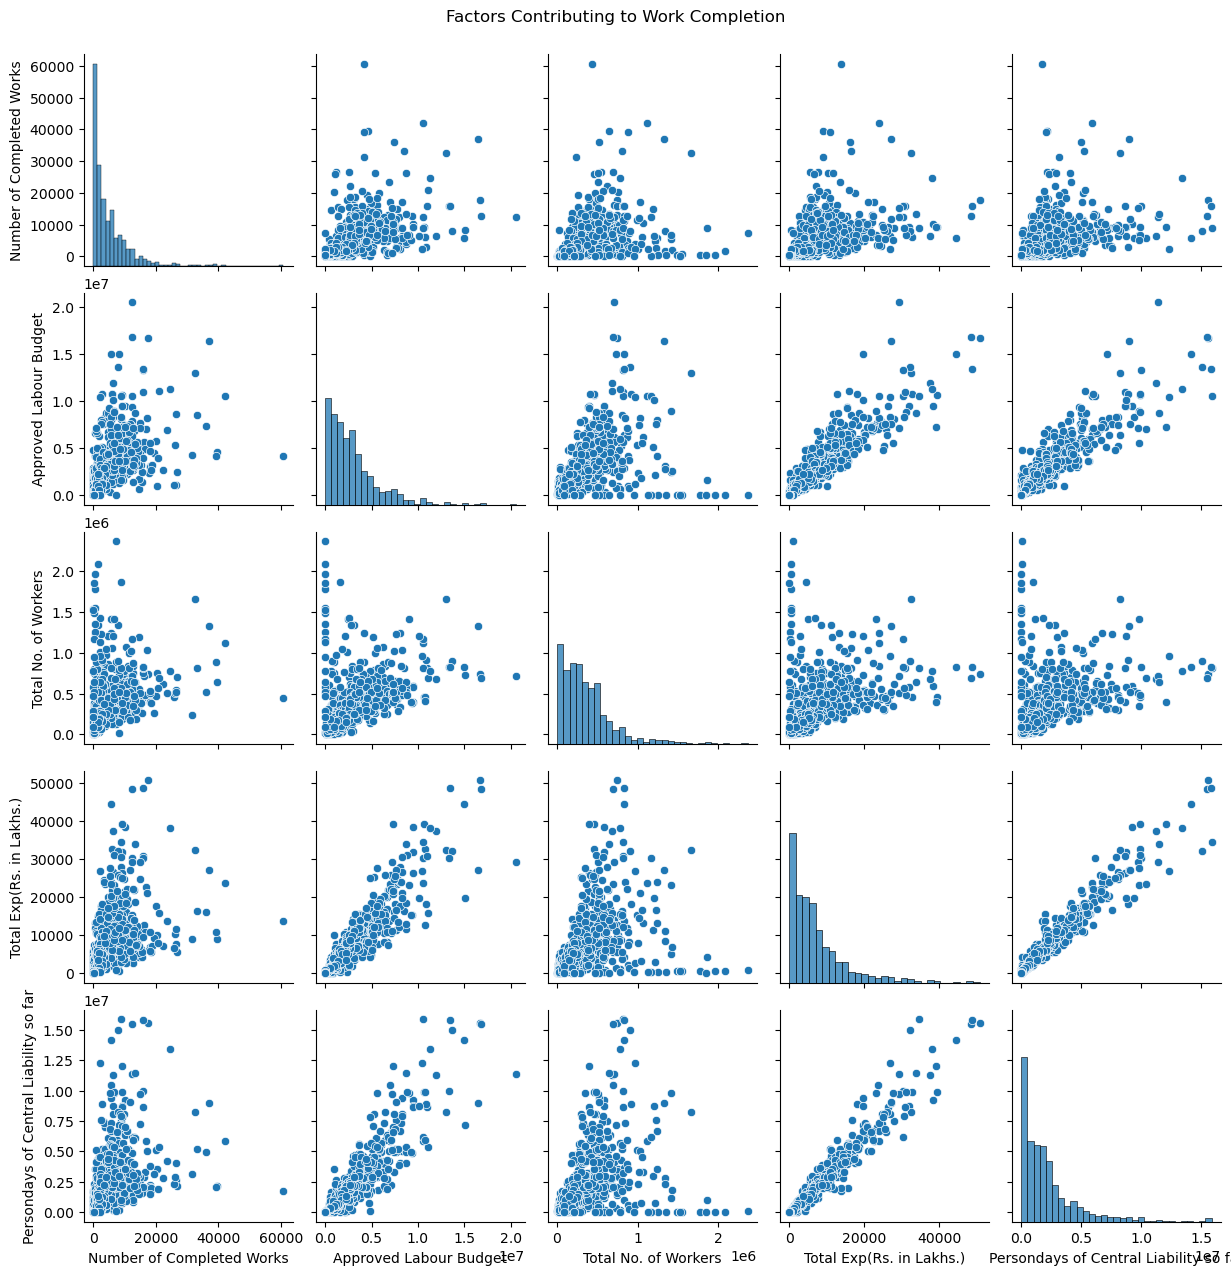

                                OLS Regression Results                               
Dep. Variable:     Number of Completed Works   R-squared:                       0.341
Model:                                   OLS   Adj. R-squared:                  0.337
Method:                        Least Squares   F-statistic:                     94.95
Date:                       Wed, 19 Jun 2024   Prob (F-statistic):           4.16e-65
Time:                               19:25:13   Log-Likelihood:                -7369.6
No. Observations:                        740   AIC:                         1.475e+04
Df Residuals:                            735   BIC:                         1.477e+04
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [5]:
work_completion_factors = df[['Number of Completed Works', 'Approved Labour Budget', 'Total No. of Workers', 'Total Exp(Rs. in Lakhs.)', 'Persondays of Central Liability so far']]

sns.pairplot(work_completion_factors)
plt.suptitle('Factors Contributing to Work Completion', y=1.02)
plt.show()

import statsmodels.api as sm

X = df[['Approved Labour Budget', 'Total No. of Workers', 'Total Exp(Rs. in Lakhs.)', 'Persondays of Central Liability so far']]
y = df['Number of Completed Works']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
